# Spam detection

kaggle dataset: https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### encoding
https://docs.python.org/3/library/codecs.html#standard-encodings%3E%60_

In [3]:
df = pd.read_csv("data/spam.csv", encoding="iso-8859-1")
df.shape

(5572, 5)

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [8]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
# drop unnecessary columns
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [5]:
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


### renaming the columns

In [6]:
df.columns = ["labels", "data"]
df.columns

Index(['labels', 'data'], dtype='object')

In [45]:
df["labels"].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [7]:
targets = dict(df["labels"].value_counts())
targets

{'ham': 4825, 'spam': 747}

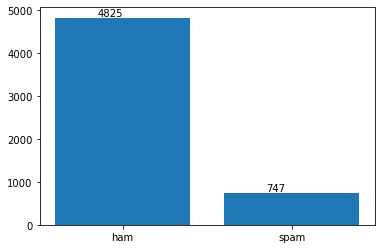

In [8]:
fig, ax = plt.subplots()

bars = ax.bar(targets.keys(), targets.values())

#show value on top of the bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.25, yval+50, str(int(yval)))

In [48]:
df.groupby("labels").describe()

data                                                               
       count unique                                                top freq
labels                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [9]:
df["b_labels"] = df["labels"].map({"ham": 0, "spam": 1})
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Text Cleaning

1. Remove punctuation

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punctuation(text):
    txt_no_punc = "".join([c for c in text if c not in string.punctuation])
    return txt_no_punc

In [22]:
df["sms_clean"] = df["data"].apply(lambda x: remove_punctuation(x))
df.head()

,labels,data,b_labels,sms_clean
0,ham,"Go until jurong point, crazy.. Available only ...",0,Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,0,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,0,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,Nah I dont think he goes to usf he lives aroun...


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df["sms_clean"], df["b_labels"].values, test_size=0.3, random_state=12)

## Try with Naive Bayes

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [26]:
model_tfidf = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_tfidf.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [27]:
model_tfidf.score(X_test, y_test)

0.9473684210526315

In [28]:
model_cv =  make_pipeline(CountVectorizer(), MultinomialNB())
model_cv.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [29]:
model_cv.score(X_test, y_test)

0.9754784688995215

#### remove `stopwords`, use `word_tokenize`

In [39]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()
wn = WordNetLemmatizer()

In [33]:
stop_words = stopwords.words("english")
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

#### `portestemmer`

In [43]:
def clean_text(txt):
    txt_no_punc = "".join([c for c in txt if c not in string.punctuation])
    tokens = word_tokenize(txt_no_punc.lower())
    txt_stem = " ".join([ps.stem(word) for word in tokens if word not in stop_words])
    return txt_stem

In [44]:
df["sms_clean_ps"] = df["sms_clean"].apply(lambda x: clean_text(x))
df.head()

,labels,data,b_labels,sms_clean,sms_clean_ps
0,ham,"Go until jurong point, crazy.. Available only ...",0,Go until jurong point crazy Available only in ...,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,Ok lar Joking wif u oni,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,U dun say so early hor U c already then say,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,Nah I dont think he goes to usf he lives aroun...,nah dont think goe usf live around though


In [51]:
X_train, X_test, y_train, y_test = train_test_split(df["sms_clean_ps"], df["b_labels"].values, test_size=0.3, random_state=12)

model_cv1 =  make_pipeline(CountVectorizer(), MultinomialNB())
model_cv1.fit(X_train, y_train)
model_cv1.score(X_test, y_test)

0.9754784688995215

In [58]:
model_ngram1 =  make_pipeline(CountVectorizer(ngram_range=(2, 4)), MultinomialNB())
model_ngram1.fit(X_train, y_train)
model_ngram1.score(X_test, y_test)

0.9760765550239234

In [62]:
model_tfidf1 = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_tfidf1.fit(X_train, y_train)
model_tfidf1.score(X_test, y_test)

0.9569377990430622

#### Lemmatization

In [46]:
def clean_text(txt):
    txt_no_punc = "".join([c for c in txt if c not in string.punctuation])
    tokens = word_tokenize(txt_no_punc.lower())
    txt_stem = " ".join([wn.lemmatize(word) for word in tokens if word not in stop_words])
    return txt_stem

In [47]:
df["sms_clean_lemma"] = df["sms_clean"].apply(lambda x: clean_text(x))
df.head()

,labels,data,b_labels,sms_clean,sms_clean_ps,sms_clean_lemma
0,ham,"Go until jurong point, crazy.. Available only ...",0,Go until jurong point crazy Available only in ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,Ok lar Joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,U dun say so early hor U c already then say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,Nah I dont think he goes to usf he lives aroun...,nah dont think goe usf live around though,nah dont think go usf life around though


In [63]:
X_train, X_test, y_train, y_test = train_test_split(df["sms_clean_lemma"], df["b_labels"].values, test_size=0.3, random_state=12)

model_cv2 =  make_pipeline(CountVectorizer(), MultinomialNB())
model_cv2.fit(X_train, y_train)
model_cv2.score(X_test, y_test)

0.9730861244019139

In [70]:
model_ngram2 =  make_pipeline(CountVectorizer(ngram_range=(2, 2)), MultinomialNB())
model_ngram2.fit(X_train, y_train)
model_ngram2.score(X_test, y_test)

0.9760765550239234

In [50]:
model_tfidf2 = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_tfidf2.fit(X_train, y_train)
model_tfidf2.score(X_test, y_test)

0.9581339712918661

## Try with tensorflow

In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [61]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [62]:
# get word
word2idx = tokenizer.word_index
V = len(word2idx)
print(f"unique tokens: {V}")

unique tokens: 7383


In [63]:
data_train = pad_sequences(sequences_train)
data_train.shape

(3900, 189)

In [64]:
# get sequence length
T = data_train.shape[1]
T

189

In [65]:
data_test = pad_sequences(sequences_test)
data_test.shape

(1672, 158)

In [70]:
data_test = pad_sequences(sequences_test, maxlen=T)
data_test.shape

(1672, 189)

In [66]:
from tensorflow.keras.layers import Input, Dense, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [71]:
# create the model

# we get to choose embedding dimensionality
D = 20

# hidden state dimensionality
M = 15

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation="sigmoid")(x)

model = Model(i, x)

In [72]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [73]:
r = model.fit(data_train,
              y_train,
              epochs=10,
              validation_data=(data_test, y_test))

Train on 3900 samples, validate on 1672 samples
Epoch 1/10
3900/3900 [==============================] - 26s 7ms/sample - loss: 0.4549 - accuracy: 0.8654 - val_loss: 0.3858 - val_accuracy: 0.8672
Epoch 2/10
3900/3900 [==============================] - 19s 5ms/sample - loss: 0.3381 - accuracy: 0.8654 - val_loss: 0.2525 - val_accuracy: 0.8672
Epoch 3/10
3900/3900 [==============================] - 19s 5ms/sample - loss: 0.1596 - accuracy: 0.9418 - val_loss: 0.1434 - val_accuracy: 0.9659
Epoch 4/10
3900/3900 [==============================] - 18s 5ms/sample - loss: 0.0850 - accuracy: 0.9900 - val_loss: 0.1208 - val_accuracy: 0.9749
Epoch 5/10
3900/3900 [==============================] - 18s 5ms/sample - loss: 0.0547 - accuracy: 0.9933 - val_loss: 0.1054 - val_accuracy: 0.9719
Epoch 6/10
3900/3900 [==============================] - 18s 5ms/sample - loss: 0.0377 - accuracy: 0.9954 - val_loss: 0.0999 - val_accuracy: 0.9743
Epoch 7/10
3900/3900 [==============================] - 18s 5ms/sample

In [74]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

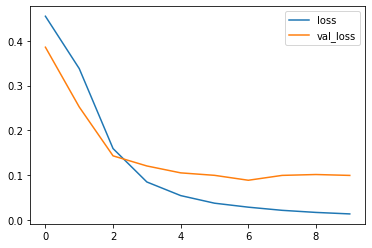

In [75]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

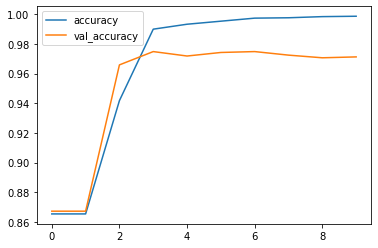

In [76]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();